In [2]:
using Flux, LinearAlgebra, CairoMakie
include("Architypes.jl")
include("FastNTKMethods.jl")

kernel

In [3]:
Nx=500
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) + cos.(xVec) + 0.2*randn(size(xVec)); 


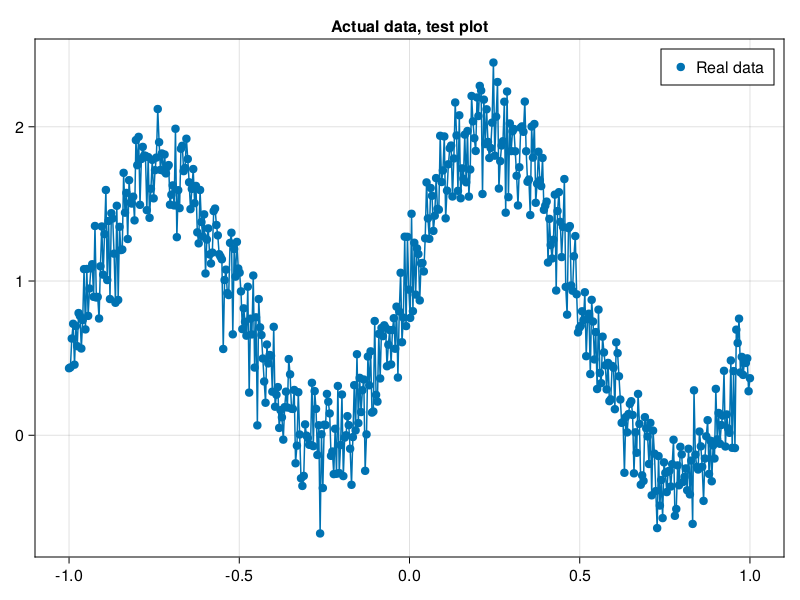

In [4]:
fig = Figure()
ax1 = Axis(fig[1,1],title="Actual data, test plot")

CairoMakie.lines!(xVec[:], yVec[:])
CairoMakie.scatter!(xVec[:], yVec[:], label="Real data")

axislegend(ax1,position=:rt)
fig

<h1>All models</h1>

In [5]:
# model_architype(architype, dimIN, dimOUT, depth, activation, critical_width=Nothing)

DEPTH = 5+2
CRI_W = 500
ACT   = relu

LH1 = model_architype("LH1",1,1,DEPTH, ACT, CRI_W)
block = model_architype("block",1,1,DEPTH, ACT, CRI_W)
funnel = model_architype("funnel",1,1,DEPTH, ACT, CRI_W)
r_funnel = model_architype("reverse_funnel",1,1,DEPTH, ACT, CRI_W)
hourglass = model_architype("hourglass",1,1,DEPTH, ACT, CRI_W)
diamond = model_architype("diamond",1,1,DEPTH, ACT, CRI_W)

E = []
diff_mode = 1

push!(E, eigen(kernel(LH1, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(block, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(funnel, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(r_funnel, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(hourglass, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(diamond, hcat(xVec...),true,diff_mode)))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07



ReverseDiff Jacobian: 0.729546 seconds (762.52 k allocations: 62.833 MiB, 2.45% gc time, 89.33% compilation time: 6% of which was recompilation)
Kernel computation: 0.054886 seconds (53.31 k allocations: 5.878 MiB, 93.17% compilation time)


Progress: 100%|█████████████████████████████████████████| Time: 0:02:45



ReverseDiff Jacobian: 161.481206 seconds (54.75 k allocations: 3.748 GiB, 0.49% gc time, 0.05% compilation time)
Kernel computation: 1.861832 seconds (3 allocations: 1.907 MiB)

ReverseDiff Jacobian: 0.003387 seconds (8.02 k allocations: 406.625 KiB)
Kernel computation: 0.000500 seconds (3 allocations: 1.907 MiB)

ReverseDiff Jacobian: 0.003217 seconds (8.02 k allocations: 406.625 KiB)
Kernel computation: 0.000509 seconds (3 allocations: 1.907 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:01:42



ReverseDiff Jacobian: 98.533570 seconds (18.82 k allocations: 1.670 GiB, 0.62% gc time)
Kernel computation: 0.814895 seconds (3 allocations: 1.907 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:01:29



ReverseDiff Jacobian: 87.949302 seconds (17.70 k allocations: 1.670 GiB, 0.59% gc time)
Kernel computation: 0.771772 seconds (3 allocations: 1.907 MiB)


6-element Vector{Any}:
 Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}([-2.9531932455029164e-14, -1.9317880628477724e-14, -1.554312234475219e-14, -1.3766765505351941e-14, -9.103828801926284e-15, -8.883261973247652e-15, -7.993605777301127e-15, -7.549516567451064e-15, -7.186559305588818e-15, -7.072842716424372e-15  …  9.259180899759882e-15, 1.0436096431476471e-14, 1.1036308861148318e-14, 1.176836406102666e-14, 1.4432899320127035e-14, 2.1316282072803006e-14, 2.531308496145357e-14, 7.422500998439812e-14, 156.9867412234674, 452.50403962599927], [-0.04128029814840328 0.04827355448808823 … 0.07967975749168597 -0.04033837069413848; -0.02894658037045706 0.012717084449540336 … 0.07937040087883004 -0.04035565855357413; … ; 0.5038151688945232 -0.022067739009358565 … -0.07437983571054724 -0.048947724693093386; 0.0 0.0 … -0.07468919232340322 -0.048965012552528726])
 Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}([-6.750155989720952e-14, -6.279495947322519e-14, -6.17284001691587

In [15]:
function nθ(m)
    p = length(Flux.params(m))
    lastbias = length(Flux.params(m)[p])
    all_params,_ = Flux.destructure(m)

    return length(all_params) - lastbias
end

nθ (generic function with 1 method)

In [44]:
fig = Figure()
ax = Axis(fig[1, 1], title="Eigenvalues of different architypes", yscale=log10)

CairoMakie.scatter!(ax, abs.(E[1].values)/nθ(LH1), label="LH1")
CairoMakie.lines!(ax, abs.(E[1].values)/nθ(LH1))

CairoMakie.scatter!(ax, abs.(E[2].values)/nθ(block), label="block")
CairoMakie.lines!(ax, abs.(E[2].values)/nθ(block))

# CairoMakie.scatter!(ax, abs.(E[5].values), label="hourglass")
# CairoMakie.lines!(ax, abs.(E[5].values))

# CairoMakie.scatter!(ax, abs.(E[6].values), label="diamond")
# CairoMakie.lines!(ax, abs.(E[6].values))
display(abs.(E[1].values))
display(abs.(E[2].values))

axislegend(ax, position=:lt)
fig

500-element Vector{Float64}:
   2.9531932455029164e-14
   1.9317880628477724e-14
   1.554312234475219e-14
   1.3766765505351941e-14
   9.103828801926284e-15
   8.883261973247652e-15
   7.993605777301127e-15
   7.549516567451064e-15
   7.186559305588818e-15
   7.072842716424372e-15
   ⋮
   1.0436096431476471e-14
   1.1036308861148318e-14
   1.176836406102666e-14
   1.4432899320127035e-14
   2.1316282072803006e-14
   2.531308496145357e-14
   7.422500998439812e-14
 156.9867412234674
 452.50403962599927

500-element Vector{Float64}:
    6.750155989720952e-14
    6.279495947322519e-14
    6.17284001691587e-14
    5.284661597215745e-14
    3.6415315207705135e-14
    3.019806626980426e-14
    2.4424906541753444e-14
    2.398081733190338e-14
    2.398081733190338e-14
    2.3092638912203256e-14
    ⋮
    3.194496536561991e-14
    3.5083047578154947e-14
    3.774758283725532e-14
    5.10702591327572e-14
    5.928590951498336e-14
    6.654899938789313e-14
    2.2604140781368187e-13
   29.425460215673567
 1600.7818899089339